In [1]:
import pandas as pd

df = pd.read_csv('../data/3go_en.openfoodfacts.org.products.csv', delimiter='\t', low_memory=False)
# On fait un échantillon aléatoire de 30% des données
sampled_df = df.sample(frac=0.3, random_state=42)

print(f"Dimensions de l'échantillon : {sampled_df.shape}")

Dimensions de l'échantillon : (457374, 183)


In [2]:
# Vérifier s'il y a des valeurs manquantes dans le dataset
print(sampled_df.isnull().sum())

code                       0
url                        0
creator                    2
created_t                  0
created_datetime           0
                       ...  
choline_100g          457366
phylloquinone_100g    456867
beta-glucan_100g      457368
inositol_100g         457364
carnitine_100g        457369
Length: 183, dtype: int64


In [3]:
def search_componant(sampled_df, suffix='_100g'):
  componant = []
  for col in sampled_df.columns:
      if '_100g' in col: componant.append(col)
  sampled_df_subset_columns = sampled_df[componant]
  return sampled_df_subset_columns

In [4]:
sampled_df_subset_nutients = search_componant(sampled_df,'_100g')
sampled_df_subset_nutients.head()

,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
832716,NaN,194.000000,812.0,NaN,8.000000,2.500000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1350068,NaN,555.000000,2322.0,NaN,32.900000,12.800000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140593,NaN,394.736842,1652.0,NaN,6.578947,1.315789,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
553186,NaN,394.000000,1648.0,NaN,31.300000,13.300000,NaN,NaN,NaN,NaN,...,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
874478,NaN,268.000000,1121.0,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print('Lignes nutriments (_100g) vides: {}'.format(sampled_df_subset_nutients.isnull().all(axis=1).sum()))

Lignes nutriments (_100g) vides: 83494


In [6]:
sampled_df = sampled_df[sampled_df_subset_nutients.notnull().any(axis=1)]
sampled_df.shape

(373880, 183)

In [7]:
# Suppression des doublons en fonction du code
sampled_df.drop_duplicates(subset ="code", keep = 'last', inplace=True)

In [8]:
sampled_df[(sampled_df["product_name"].isnull()==False) 
      & (sampled_df["brands"].isnull()==False)].groupby(by=["product_name","brands"])["code"].nunique().sort_values(ascending=False)

product_name            brands                 
Filet de poulet         La Nouvelle Agriculture    51
Burger vegetariana      Bonarea                    49
Burger vegana           Bonarea                    44
Aiguillettes de poulet  La Nouvelle Agriculture    37
Filets de poulet rôti   Le Gaulois                 29
                                                   ..
Fromage                 Compliments                 1
                        Deluxe                      1
                        Entremont                   1
                        Entrepinares                1
한살림 호박쌀엿                한살림                         1
Name: code, Length: 209836, dtype: int64

In [9]:
sampled_df = sampled_df[(sampled_df["product_name"]!="한살림 호박쌀엿") 
              & (sampled_df["brands"]!="한살림")]

In [10]:
# Suppression des doublons sur marque et produit en conservant les valeurs nulles
sampled_df = sampled_df[(~sampled_df.duplicated(["product_name","brands"],keep="last")) 
      | ((sampled_df['product_name'].isnull()) & (sampled_df['brands'].isnull()))]

In [11]:
sampled_df.shape

(332486, 183)

In [12]:
category_columns = ['categories','categories_tags','categories_en']
sampled_df[sampled_df[category_columns].notnull().any(axis=1)][['product_name'] + category_columns].sample(5)

,product_name,categories,categories_tags,categories_en
741327,6 Palmiers d'Armor,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...","en:snacks,en:sweet-snacks,en:biscuits-and-cake...","Snacks,Sweet snacks,Biscuits and cakes,Biscuit..."
1497786,Instant noodles,Nouilles instantannée,fr:nouilles-instantannee,fr:nouilles-instantannee
364387,Star wars dispenser with candy pieces,"Snacks, Sweet snacks, Confectioneries","en:snacks,en:sweet-snacks,en:confectioneries","Snacks,Sweet snacks,Confectioneries"
1186775,NaN,"en:Plant-based foods and beverages, en:Plant-b...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo..."
355889,Chocolate velvet soymilk non-dairy frozen dess...,"Desserts, Frozen foods, Frozen desserts","en:desserts,en:frozen-foods,en:frozen-desserts","Desserts,Frozen foods,Frozen desserts"


In [13]:
def search_redundant_col(sampled_df):
  redundant_columns = []
  for col in sampled_df.columns:
    if "_en" in col:
      en = col.replace('_en','')
      tags = col.replace('_en','_tags')
      print("{:<20} 'Sans suffixe' -> {} ; 'Suffixe _tags' -> {}".format(col,
                                                                        en in sampled_df.columns, tags in sampled_df.columns))
      if en in sampled_df.columns : 
        redundant_columns.append(en)
      if tags in sampled_df.columns : 
        redundant_columns.append(tags)
  
    if '_tags' in col:
      tags_2 = col.replace('_tags','')
      print("{:<20} 'Suffixe _tags' -> {} ;".format(tags_2, tags_2 in sampled_df.columns))
      if tags_2 in sampled_df.columns :
        redundant_columns.append(col)

  return redundant_columns

In [14]:
sampled_df.drop(search_redundant_col(sampled_df), axis=1, inplace=True)

packaging            'Suffixe _tags' -> True ;
brands               'Suffixe _tags' -> True ;
categories           'Suffixe _tags' -> True ;
categories_en        'Sans suffixe' -> True ; 'Suffixe _tags' -> True
origins              'Suffixe _tags' -> True ;
origins_en           'Sans suffixe' -> True ; 'Suffixe _tags' -> True
manufacturing_places 'Suffixe _tags' -> True ;
labels               'Suffixe _tags' -> True ;
labels_en            'Sans suffixe' -> True ; 'Suffixe _tags' -> True
emb_codes            'Suffixe _tags' -> True ;
cities               'Suffixe _tags' -> True ;
countries            'Suffixe _tags' -> True ;
countries_en         'Sans suffixe' -> True ; 'Suffixe _tags' -> True
allergens_en         'Sans suffixe' -> True ; 'Suffixe _tags' -> False
traces               'Suffixe _tags' -> True ;
traces_en            'Sans suffixe' -> True ; 'Suffixe _tags' -> True
additives            'Suffixe _tags' -> True ;
additives_en         'Sans suffixe' -> True ; 'Suffixe _tags' 

In [15]:
sampled_df['created_datetime'] = pd.to_datetime(sampled_df['created_t'], unit='s')
sampled_df['last_modified_datetime'] = pd.to_datetime(sampled_df['last_modified_t'], unit='s')
sampled_df = sampled_df.drop(['created_t','last_modified_t'], axis=1)
sampled_df.head()

,code,url,creator,created_datetime,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_text,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
832716,3596690138040,http://world-en.openfoodfacts.org/product/3596...,kiliweb,2018-01-09 17:30:19,2019-07-26 04:19:02,Escalope Carbonara Pere Dodu,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1350068,8413925167109,http://world-en.openfoodfacts.org/product/8413...,kiliweb,2019-12-02 15:07:49,2019-12-02 16:09:09,Bombon cacahuete,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140593,0055577105030,http://world-en.openfoodfacts.org/product/0055...,kiliweb,2020-08-25 18:20:39,2020-08-29 21:02:58,Muffins faible en gras,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
950072,4000540002546,http://world-en.openfoodfacts.org/product/4000...,twoflower,2015-07-05 05:49:20,2020-07-04 09:44:24,Schmelzflocken Dinkel-Hafer,Leicht lösliche Vollkorn-Dinkel-Hafernahrung,225 g,Karton,NaN,...,NaN,-6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
476313,2095110,http://world-en.openfoodfacts.org/product/2095...,openfoodfacts-contributors,2019-04-03 19:33:45,2019-04-03 19:45:47,purée pomme pruneaux sans sucre ajouté,NaN,800 g (2x (4x100g) ),8 pots de 100 g,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


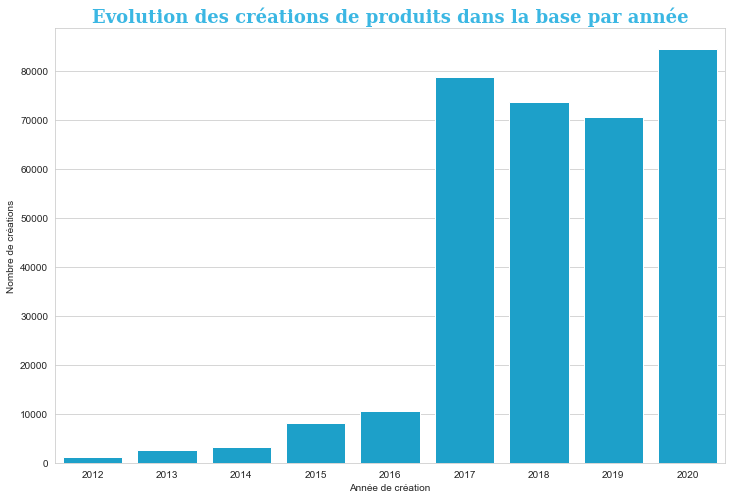

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

add_per_year = sampled_df[['created_datetime', 'code']].groupby(by=sampled_df['created_datetime'].dt.year).nunique()

fig=plt.figure(figsize=(12,8))

sns.set_style("whitegrid")
sns.barplot(data=add_per_year, x=add_per_year.index, y='code', color='#00afe6')

font_title = {'family': 'serif',
              'color':  '#3BB7E3',
              'weight': 'bold',
              'size': 18,
             }
plt.title("Evolution des créations de produits dans la base par année", fontdict=font_title)
plt.xlabel("Année de création")
plt.ylabel("Nombre de créations")
plt.show()

In [21]:
sampled_df.shape

(332486, 158)

In [23]:
countries = sampled_df.groupby(by="countries_en").nunique()

In [24]:
countries[['code']].head()

,code
countries_en,
"Afghanistan,France",38
"Afghanistan,France,Germany",1
"Afghanistan,France,Switzerland",1
Albania,2
"Albania,Argentina,European Union,France,Italy,Spain,Swaziland,United Kingdom,United States",1


In [25]:
def split_words(sampled_df, column = 'countries_en'):
  list_words = set()
  for word in sampled_df[column].str.split(','):
    if isinstance(word, float):
      continue
    list_words = set().union(word, list_words)
  return list(list_words)

In [26]:
#Liste contenant tous les pays du jeu de données (bons ou mauvais)
list_countries = split_words(sampled_df, 'countries_en')

In [27]:
print("Nombre de pays représentés : {}".format(len(list_countries)))

Nombre de pays représentés : 317


In [28]:
sampled_df[['categories_en','pnns_groups_1','pnns_groups_2','main_category_en',]].sample(10)

,categories_en,pnns_groups_1,pnns_groups_2,main_category_en
385258,Snacks,unknown,unknown,Snacks
1214547,"Plant-based foods and beverages,Plant-based fo...",Cereals and potatoes,Cereals,Quinoa
1182954,"Plant-based foods and beverages,Plant-based fo...",Cereals and potatoes,Cereals,Instant noodles
332978,"Biscuits and cakes,Cakes,Cooking helpers,Desse...",Sugary snacks,Biscuits and cakes,Cake mixes
961672,"Plant-based foods and beverages,Plant-based fo...",Salty snacks,Salty and fatty products,Salted-snacks
1521942,Dry-goods,unknown,unknown,Dry-goods
410885,"Groceries,Sauces",Fat and sauces,Dressings and sauces,Sauces
697844,"Plant-based foods and beverages,Plant-based fo...",Fruits and vegetables,Vegetables,Canned peppers
303615,Snacks,unknown,unknown,Snacks
12602,Frozen foods,unknown,unknown,Frozen foods


In [30]:
categories = split_words(sampled_df, column = 'categories_en')
print("{} catégories sont représentées dans le jeu de données.".format(len(categories)))

13042 catégories sont représentées dans le jeu de données.


In [32]:
import numpy as np

sampled_df['categories_en'] = np.where((sampled_df['categories_en'].isnull()==True), "unknown", 
                                 np.where(sampled_df['categories_en'] == "", "unknown", sampled_df['categories_en']))
sampled_df['main_category_en'] = np.where((sampled_df['main_category_en'].isnull()==True), "unknown", 
                                 np.where(sampled_df['main_category_en'] == "", "unknown", sampled_df['main_category_en']))
sampled_df['pnns_groups_1'] = np.where((sampled_df['pnns_groups_1'].isnull()==True), "unknown", 
                                 np.where(sampled_df['pnns_groups_1'] == "", "unknown", sampled_df['pnns_groups_1']))
sampled_df['pnns_groups_2'] = np.where((sampled_df['pnns_groups_2'].isnull()==True), "unknown", 
                                 np.where(sampled_df['pnns_groups_2'] == "", "unknown", sampled_df['pnns_groups_2']))